In [84]:
%matplotlib ipympl
import numpy as np
import sympy as sym
import matplotlib.pyplot as plt

En primer lugar, vamos a mostrar que $u_k = (1+\Delta t\alpha)^ku_0$ de manera teórica, por medio de una prueba por inducción.

Para el caso base, examinaremos lo que sucede con $u_1$. Usando el método de Euler, vemos que:

$$
u_1 = u_0 + \Delta t\frac{du_0}{dt}
$$

Usando la definición de $\frac{du}{dt}$, obtenemos:

$$
u_1 = u_0 + \Delta t\alpha u_0 = (1+\Delta t\alpha)u_0
$$

De esta manrea, comprobamos el caso base. Para el paso inductivo, asumiremos que la propiedad $u_k = (1+\Delta t\alpha)^ku_0$ se cumple para un cierto k, y usando esto la probamos para $u_{k+1}$.

$$
u_{k+1} = u_k + \Delta t\frac{du_k}{dt} = u_k + \Delta t \alpha u_k = (1+\Delta t \alpha)u_k = (1+\Delta t \alpha)(1+\Delta t\alpha)^ku_0 = (1+\Delta t\alpha)^{k+1}u_0
$$

In [85]:
u, t, a, h = sym.symbols('u t a h')

In [86]:
def f(y,a):
    return a*y

In [87]:
def x_n1(x_n, h):
    return x_n + h 

In [88]:
def y_n1(y_n, h, f, a):
    return y_n + h * f(y_n,a)

In [89]:
def euler(f, x0, y0, h, a, n):
    x = [x0]
    y = [y0]
    for i in range(n):
        x.append(x_n1(x[-1], h))
        y.append(y_n1(y[-1], h, f, a))
    return x, y

In [90]:
eq = euler(f, t, u, h, a, 4)
res = sym.simplify(eq[1][-1])
res

u*(a**4*h**4 + 4*a**3*h**3 + 6*a**2*h**2 + 4*a*h + 1)

Primero vale la pena devolvernos al algoritmo de Euler y revisar como cambia t en cada iteración. t está dado por:
$$
t_{n+1} = t_{n} + h
$$
Dado que nuestra condición inicial es que t=0 entonces cada iteración n, t tiene un cambio de h, por lo cual:
$$
\Delta t = h
$$
Con esto entonces podemos hacer un par de verificaciones.

In [91]:
def uk(a, t, u0, k):
    return u0 * (1 + a * t)**k

In [92]:
eq = euler(f, t, u, h, a, 5)
res = sym.simplify(eq[1][-1])
res

u*(a**5*h**5 + 5*a**4*h**4 + 10*a**3*h**3 + 10*a**2*h**2 + 5*a*h + 1)

In [93]:
res2 = uk(a, h, u, 5)

In [94]:
equiv = res.equals(res2)
equiv

True

Con esto comprobamos que para grado 5 estas dos expresiones son equivalentes. Ahora haremos este mismo proceso para otro par de grados de k para estar seguros.

In [95]:
def comprobar(a, t, u0, k):
    eq = euler(f, t, u0, h, a, 5)
    res = sym.simplify(eq[1][-1])
    res2 = uk(a, h, u0, 5)
    return res.equals(res2)

In [96]:
for k in range(11):
    print("Grado de K: " + str(k) + " Equivalentes: " + str(comprobar(a, t, u, k)))

Grado de K: 0 Equivalentes: True
Grado de K: 1 Equivalentes: True
Grado de K: 2 Equivalentes: True
Grado de K: 3 Equivalentes: True
Grado de K: 4 Equivalentes: True
Grado de K: 5 Equivalentes: True
Grado de K: 6 Equivalentes: True
Grado de K: 7 Equivalentes: True
Grado de K: 8 Equivalentes: True
Grado de K: 9 Equivalentes: True
Grado de K: 10 Equivalentes: True


Con lo anterior en mente, podemos probar el metodo. Sabemos que la solución de la ecuación diferencial es:
$$
u = e^{\alpha t}
$$
Con lo cual graficamos y comprobamos las condiciones.

In [97]:
def f_real(t, a):
    return np.exp(a*t)

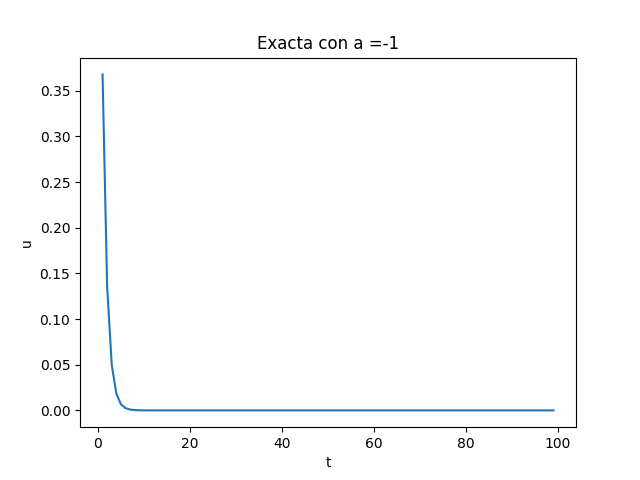

In [98]:
#Para a<0
plt.clf()
a = -1
t = np.arange(1,100,1)
u = f_real(t, a)
plt.plot(t, u, label='Real')
plt.xlabel('t')
plt.ylabel('u')
plt.title('Exacta con a =-1')
plt.show()

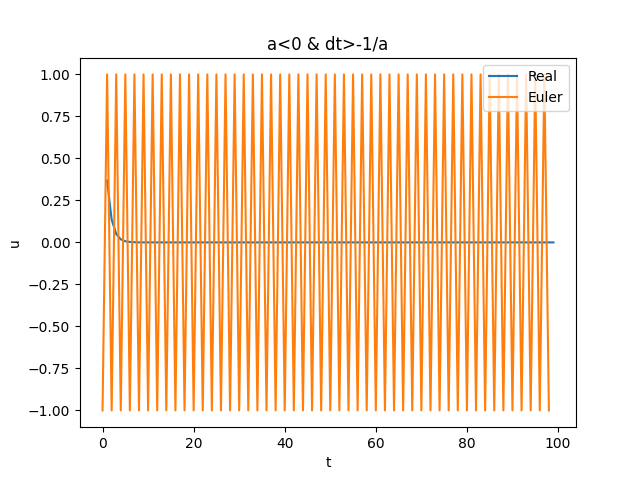

In [99]:
fig, ax = plt.subplots()  # Create a new figure and axes object
a = -1
t = np.arange(1,100,1)
u = f_real(t, a)
ax.plot(t, u, label='Real')  # Use the axes object to plot
h = 2
u = np.zeros((len(t), 1))
for i in range(len(t)):
    u[i] = uk(a, h, 1, t[i])
ax.plot(u, label='Euler')  # Use the axes object to plot
ax.set_xlabel('t')  # Use the axes object to set x-label
ax.set_ylabel('u')  # Use the axes object to set y-label
ax.set_title('a<0 & dt>-1/a')  # Use the axes object to set title
ax.legend()  # Use the axes object to add legend
plt.show()

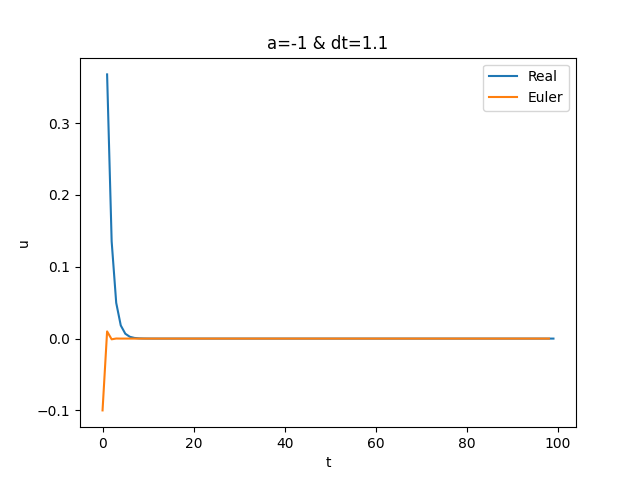

In [100]:
#Para a<0
fig, ax = plt.subplots()  # Create a new figure and axes object
a = -1
t = np.arange(1,100,1)
u = f_real(t, a)
ax.plot(t, u, label='Real')  # Use the axes object to plot
h = 1.1
u = np.zeros((len(t), 1))
for i in range(len(t)):
    u[i] = uk(a, h, 1, t[i])
ax.plot(u, label='Euler')  # Use the axes object to plot
ax.set_xlabel('t')  # Use the axes object to set x-label
ax.set_ylabel('u')  # Use the axes object to set y-label
ax.set_title('a=-1 & dt=1.1')  # Use the axes object to set title
ax.legend()  # Use the axes object to add legend
plt.show()

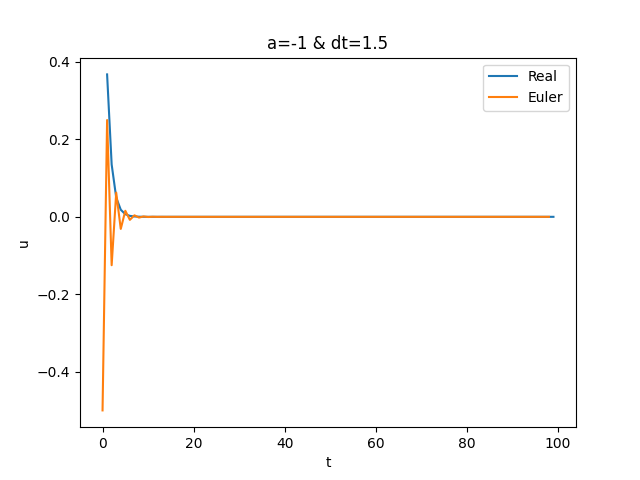

In [101]:
#Para a<0
fig, ax = plt.subplots()  # Create a new figure and axes object
a = -1
t = np.arange(1,100,1)
u = f_real(t, a)
ax.plot(t, u, label='Real')  # Use the axes object to plot
h = 1.5
u = np.zeros((len(t), 1))
for i in range(len(t)):
    u[i] = uk(a, h, 1, t[i])
ax.plot(u, label='Euler')  # Use the axes object to plot
ax.set_xlabel('t')  # Use the axes object to set x-label
ax.set_ylabel('u')  # Use the axes object to set y-label
ax.set_title('a=-1 & dt=1.5')  # Use the axes object to set title
ax.legend()  # Use the axes object to add legend
plt.show()

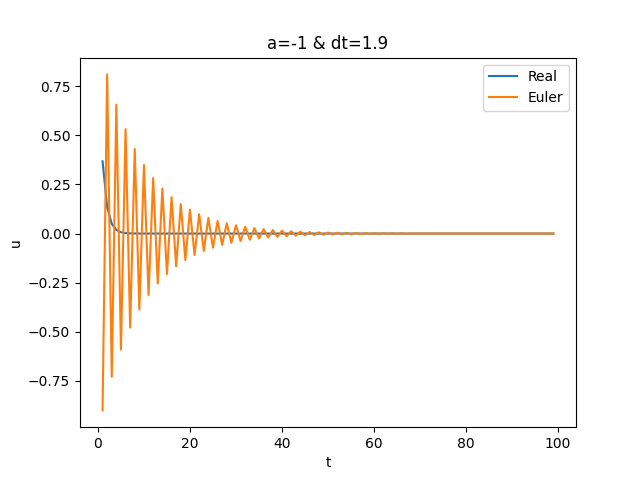

In [102]:
fig, ax = plt.subplots()  # Create a new figure and axes object
a = -1
t = np.arange(1,100,1)
u = f_real(t, a)
ax.plot(t, u, label='Real')  # Use the axes object to plot
h = 1.9
u = np.zeros((len(t), 1))
for i in range(len(t)):
    u[i] = uk(a, h, 1, t[i])

ax.plot(t, u, label='Euler')  # Use the axes object to plot
ax.set_xlabel('t')  # Use the axes object to set x-label
ax.set_ylabel('u')  # Use the axes object to set y-label
ax.set_title('a=-1 & dt=1.9')  # Use the axes object to set title
ax.legend()  # Use the axes object to add legend
plt.show()